In [73]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from isyatirimhisse import StockData, Financials

In [1084]:
financials = Financials()
df = financials.get_data(
    symbols='TAVHL',
    start_year='2010',
    save_to_excel=True
)


Data saved to financials_20240830


In [74]:
bilanco=pd.read_excel("financials_20240830.xlsx")

In [75]:
current_liabilities=bilanco[bilanco['itemDescTr'].str.contains('yükümlülük', case=False, na=False)].iloc[:4,3:].sum(axis=0)
total_liabilities=bilanco[bilanco['itemDescTr'].str.contains('yükümlülük', case=False, na=False)].iloc[:,3:].sum(axis=0)

In [76]:
current_assets = bilanco.loc[bilanco['itemDescEng'] == 'CURRENT ASSETS'].values[0][3:]
total_assets = bilanco.loc[bilanco['itemDescEng'] == 'TOTAL ASSETS'].values[0][3:]
shareholders_equity = bilanco.loc[bilanco['itemDescEng'] == 'SHAREHOLDERS EQUITY'].values[0][3:]
net_profit_after_taxes = bilanco.loc[bilanco['itemDescEng'] == 'NET PROFIT AFTER TAXES'].values[0][3:]
domestic_sales = bilanco.loc[bilanco['itemDescEng'] == 'Domestic Sales'].values[0][3:]
export_sales = bilanco.loc[bilanco['itemDescEng'] == 'Export Sales'].values[0][3:]
netkar=bilanco.loc[bilanco['itemDescTr'] == 'Dönem Net Kar/Zararı'].values[0][3:]
özkaynaklar=bilanco.loc[bilanco['itemDescTr'] == 'Özkaynaklar'].values[0][3:]
satışlar=bilanco.loc[bilanco['itemDescTr'] == 'Satış Gelirleri'].values[0][3:]
brütkar=bilanco.loc[bilanco['itemDescTr'] == 'BRÜT KAR (ZARAR)'].values[0][3:]
faaliyetkarı=bilanco.loc[bilanco['itemDescTr'] == 'FAALİYET KARI (ZARARI)'].values[0][3:]
# Calculate the ratios
current_ratio = current_assets / current_liabilities
debt_to_equity_ratio = total_liabilities / shareholders_equity
return_on_equity = net_profit_after_taxes / shareholders_equity
net_profit_margin = net_profit_after_taxes / satışlar
roe=netkar/özkaynaklar
asset_turnover=satışlar/total_assets
brütkarmarjı=brütkar/satışlar
faaliyetkarmarj=faaliyetkarı/satışlar

def tolist(array):
    array=pd.DataFrame(array).reset_index()
    del array["index"]
    return array
current_ratio=tolist(current_ratio)
debt_to_equity_ratio=tolist(debt_to_equity_ratio)
return_on_equity=tolist(return_on_equity)
net_profit_margin=tolist(net_profit_margin)
roe=tolist(roe)
asset_turnover=tolist(asset_turnover)
brütkarmarjı=tolist(brütkarmarjı)
faaliyetkarmarj=tolist(faaliyetkarmarj)
satışlar=tolist(satışlar)
netkar=tolist(netkar)
current_assets=tolist(current_assets)
total_assets=tolist(total_assets)
net_profit_after_taxes=tolist(net_profit_after_taxes)
özkaynaklar=tolist(özkaynaklar)
brütkar=tolist(brütkar)
faaliyetkarı=tolist(faaliyetkarı)

In [77]:
hisse=yf.download(tickers="TAVHL.IS",start="2010-01-02",interval="1wk")
hisse = hisse.resample('Q').agg({'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'mean',
    'Volume': 'sum'
})
hisse["Return"]=((hisse["Close"].shift(-2)/hisse["Close"])-1)*100

[*********************100%***********************]  1 of 1 completed


In [78]:
rasyo=pd.concat([current_ratio,debt_to_equity_ratio,return_on_equity,net_profit_margin,roe,asset_turnover,brütkarmarjı,faaliyetkarmarj,satışlar,netkar,current_assets,total_assets,net_profit_after_taxes,özkaynaklar,brütkar,faaliyetkarı],axis=1)
rasyo.columns=["Cari Oran","Borçluluk Oranı","Return On Equity","Net Kar Marjı","ROE","Devir Hızı","Brüt Kar Marjı","Faaliyet Kar Marjı","s","n","c","t","favök","özkaynak","brütkar","faaliyetkarı"]
rasyo["Fiyat"]=hisse["Close"].values[:-1]
rasyo["Return"]=hisse["Return"].values[:-1]
rasyo=rasyo.set_index(pd.date_range(start="2010-03-31",freq="Q",periods=len(rasyo)))
rasyo=rasyo.iloc[2:,:]
rasyo["Return"]=rasyo["Return"].fillna(0)
rasyo

,Cari Oran,Borçluluk Oranı,Return On Equity,Net Kar Marjı,ROE,Devir Hızı,Brüt Kar Marjı,Faaliyet Kar Marjı,s,n,c,t,favök,özkaynak,brütkar,faaliyetkarı,Fiyat,Return
2010-09-30,1.19,3.33,0.08,0.07,0.07,0.27,0.32,0.19,1099765894.00,66682069.00,1331276755.00,4024606068.00,78519345.00,1009639635.00,355012154.00,207260126.00,6.78,5.61
2010-12-31,1.20,3.03,0.09,0.07,0.09,0.36,0.29,0.16,1501207066.00,98993553.00,1367891599.00,4179087055.00,102691163.00,1107303831.00,440006424.00,240124457.00,7.66,2.98
2011-03-31,1.14,3.00,-0.03,-0.09,-0.03,0.09,0.21,0.07,387326000.00,-31066472.00,1215548199.00,4360035822.00,-36097000.00,1159361913.00,82335000.00,28568000.00,7.16,3.08
2011-06-30,1.10,3.11,-0.01,-0.02,-0.01,0.19,0.26,0.14,922421000.00,-9998851.00,1387997432.00,4744524905.00,-13920000.00,1234204036.00,242655000.00,127519000.00,7.89,-0.45
2011-09-30,1.09,3.09,0.06,0.06,0.06,0.30,0.31,0.19,1538630000.00,80135771.00,1616743346.00,5149439512.00,84651000.00,1360671737.00,470279000.00,291448000.00,7.39,14.13
2011-12-31,1.22,2.99,0.09,0.06,0.09,0.40,0.31,0.18,2037572000.00,122639000.00,1724774000.00,5086155000.00,120501000.00,1374450000.00,625972000.00,368684000.00,7.85,18.06
2012-03-31,1.01,2.98,0.02,0.06,0.02,0.07,0.29,0.15,348661000.00,28071000.00,1401485000.00,4885763000.00,21660000.00,1330500000.00,100548000.00,53384000.00,8.43,10.57
2012-06-30,1.07,2.98,0.08,0.14,0.09,0.17,0.35,0.21,798745000.00,112820000.00,1500835000.00,4749624000.00,108633000.00,1294835000.00,277087000.00,170812000.00,9.27,-3.75
2012-09-30,1.30,3.03,0.18,0.19,0.17,0.25,0.40,0.27,1326075000.00,235442000.00,1978112000.00,5251165000.00,252845000.00,1413739000.00,529909000.00,364468000.00,9.32,15.89
2012-12-31,2.11,3.35,0.24,0.16,0.23,0.37,0.38,0.26,1863616000.00,297170000.00,1701346000.00,4980503000.00,304493000.00,1265355000.00,709076000.00,484302000.00,8.92,30.09


In [79]:
rasyo=rasyo.astype(float)

In [80]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
rasyo_scaled=scaler.fit_transform(rasyo.iloc[:,:-1])
rasyo_scaled=pd.DataFrame(rasyo_scaled,columns=rasyo.columns[:-1])
rasyo_scaled["Return"]=rasyo["Return"].values
rasyo_scaled

,Cari Oran,Borçluluk Oranı,Return On Equity,Net Kar Marjı,ROE,Devir Hızı,Brüt Kar Marjı,Faaliyet Kar Marjı,s,n,c,t,favök,özkaynak,brütkar,faaliyetkarı,Fiyat,Return
0,0.07,1.17,-0.01,-0.03,-0.12,0.98,-0.62,-0.04,-0.48,-0.33,-0.68,-0.66,-0.33,-0.65,-0.51,-0.50,-0.63,5.61
1,0.11,0.43,0.13,-0.04,0.11,1.79,-1.01,-0.25,-0.42,-0.31,-0.68,-0.66,-0.32,-0.64,-0.48,-0.48,-0.61,2.98
2,-0.07,0.36,-1.04,-0.57,-1.01,-0.75,-2.07,-0.87,-0.59,-0.40,-0.70,-0.66,-0.41,-0.64,-0.61,-0.63,-0.62,3.08
3,-0.15,0.63,-0.85,-0.31,-0.83,0.24,-1.41,-0.41,-0.51,-0.39,-0.68,-0.65,-0.40,-0.63,-0.55,-0.56,-0.61,-0.45
4,-0.19,0.59,-0.16,-0.09,-0.19,1.22,-0.85,-0.04,-0.42,-0.32,-0.65,-0.64,-0.33,-0.62,-0.47,-0.44,-0.62,14.13
5,0.16,0.33,0.08,-0.07,0.10,2.18,-0.83,-0.10,-0.34,-0.29,-0.64,-0.64,-0.30,-0.62,-0.41,-0.39,-0.61,18.06
6,-0.38,0.31,-0.59,-0.06,-0.55,-0.92,-1.07,-0.30,-0.60,-0.36,-0.68,-0.64,-0.37,-0.63,-0.61,-0.61,-0.59,10.57
7,-0.24,0.32,0.05,0.18,0.08,-0.01,-0.31,0.14,-0.53,-0.30,-0.66,-0.65,-0.31,-0.63,-0.54,-0.53,-0.57,-3.75
8,0.36,0.44,0.95,0.35,0.84,0.79,0.38,0.58,-0.45,-0.21,-0.61,-0.63,-0.21,-0.62,-0.44,-0.39,-0.57,15.89
9,2.47,1.23,1.53,0.27,1.50,1.93,0.13,0.47,-0.37,-0.17,-0.64,-0.64,-0.18,-0.63,-0.37,-0.31,-0.58,30.09


In [38]:
X=rasyo_scaled.drop("Return",axis=1)
y=rasyo_scaled["Return"]
X_train, y_train = X[:-12], y[:-12]
X_test, y_test = X[-12:], y[-12:]

In [ ]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

In [12]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,259797.01,-141705.91,12022.12,0.01
RANSACRegressor,97.33,-51.54,231.50,0.10
LinearRegression,36.19,-18.20,139.93,0.01
TransformedTargetRegressor,36.19,-18.20,139.93,0.02
OrthogonalMatchingPursuit,35.12,-17.61,137.78,0.01
OrthogonalMatchingPursuitCV,35.12,-17.61,137.78,0.02
KernelRidge,34.94,-17.52,137.42,0.01
SGDRegressor,32.31,-16.08,131.97,0.01
Ridge,32.01,-15.92,131.35,0.01


In [41]:
import optuna
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor


def objective(trial):
    # Define the hyperparameters to be tuned
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 1.0, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)

    # Create the model with the suggested hyperparameters
    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample,
        random_state=42
    ).fit(X_train,y_train)
    predictions=model.predict(X_test)

    tahminler=pd.DataFrame()
    tahminler["Hedef Fiyat"]=hisse["Close"][-13:-2]*(1+(predictions[:-1]/100))
    tahminler["Gerçekleşen Fiyat"]=hisse["Close"].loc["2022-03-31":].values

    return np.sqrt(mean_squared_error(tahminler["Gerçekleşen Fiyat"][:-1],tahminler["Hedef Fiyat"][:-1]))

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500)

# Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)
print("Best score: ", study.best_value)

[I 2024-08-30 22:55:24,029] A new study created in memory with name: no-name-1a565121-5c89-400a-b915-891faa104acc
[I 2024-08-30 22:55:24,391] Trial 0 finished with value: 40.69744756535842 and parameters: {'n_estimators': 526, 'max_depth': 22, 'learning_rate': 0.8601439906798759, 'min_samples_split': 14, 'min_samples_leaf': 20, 'subsample': 0.8091132194893109}. Best is trial 0 with value: 40.69744756535842.
[I 2024-08-30 22:55:24,901] Trial 1 finished with value: 40.11805695039601 and parameters: {'n_estimators': 840, 'max_depth': 17, 'learning_rate': 0.005068725568395125, 'min_samples_split': 5, 'min_samples_leaf': 20, 'subsample': 0.5921119407821869}. Best is trial 1 with value: 40.11805695039601.
[I 2024-08-30 22:55:25,720] Trial 2 finished with value: 38.538880463020035 and parameters: {'n_estimators': 849, 'max_depth': 20, 'learning_rate': 0.16915664882961448, 'min_samples_split': 10, 'min_samples_leaf': 11, 'subsample': 0.8952917246683063}. Best is trial 2 with value: 38.53888046

Best hyperparameters:  {'n_estimators': 208, 'max_depth': 32, 'learning_rate': 0.6821117459852161, 'min_samples_split': 2, 'min_samples_leaf': 2, 'subsample': 0.6669187977814462}
Best score:  22.422740070376825


In [42]:
from sklearn.ensemble import GradientBoostingRegressor
params=study.best_params
model = GradientBoostingRegressor(**params,random_state=42
    ).fit(X_train,y_train)
predictions=model.predict(X_test)

In [43]:
tahminler=pd.DataFrame()
tahminler["Hedef Fiyat"]=hisse["Close"][-13:-2]*(1+(predictions[:-1]/100))
tahminler["Gerçekleşen Fiyat"]=hisse["Close"].loc["2022-03-31":].values
tahminler

,Hedef Fiyat,Gerçekleşen Fiyat
Date,,
2021-09-30,36.49,36.44
2021-12-31,40.99,45.86
2022-03-31,53.06,60.89
2022-06-30,62.98,84.27
2022-09-30,77.25,78.12
2022-12-31,121.03,81.04
2023-03-31,106.82,119.02
2023-06-30,116.99,116.72
2023-09-30,189.53,156.35


In [44]:
hisse=yf.download(tickers="TAVHL.IS",start="2022-01-01",interval="1wk")
hisse["Date"]=pd.to_datetime(hisse.index)
hisse["Q"]=hisse["Date"].dt.quarter
hisse["Year"]=hisse["Date"].dt.year
hisse

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date,Q,Year
Date,,,,,,,,,
2022-01-03,32.64,37.44,32.10,37.32,37.32,54643293,2022-01-03,1,2022
2022-01-10,37.60,39.78,37.60,38.24,38.24,52294851,2022-01-10,1,2022
2022-01-17,38.40,39.90,35.80,37.02,37.02,37112636,2022-01-17,1,2022
2022-01-24,36.96,38.46,34.02,37.06,37.06,39157071,2022-01-24,1,2022
2022-01-31,37.56,37.60,34.64,34.64,34.64,23987293,2022-01-31,1,2022
...,...,...,...,...,...,...,...,...,...
2024-07-29,273.75,274.75,258.75,263.50,263.50,11248361,2024-07-29,3,2024
2024-08-05,237.50,260.00,237.50,243.70,243.70,11934025,2024-08-05,3,2024
2024-08-12,245.00,247.50,231.50,236.70,236.70,10383823,2024-08-12,3,2024


In [45]:
hisse["Hedef"]=0
hisse["Hedef"].loc[(hisse.index<tahminler.index[2]) & (hisse.index>tahminler.index[1])]=tahminler["Hedef Fiyat"].iloc[0]
hisse["Hedef"].loc[(hisse.index<tahminler.index[2]) & (hisse.index>tahminler.index[1])]=tahminler["Hedef Fiyat"].iloc[0]
for i in range(3,len(tahminler)):
    hisse["Hedef"].loc[(hisse.index<tahminler.index[i]) & (hisse.index>tahminler.index[i-1])]=tahminler["Hedef Fiyat"].iloc[i-2]
hisse["Hedef"].loc["2024-04-01":"2024-06-30"]=tahminler["Hedef Fiyat"].iloc[-2]
hisse["Hedef"].loc["2024-07-01":]=tahminler["Hedef Fiyat"].iloc[-1]


In [46]:
tahminler

,Hedef Fiyat,Gerçekleşen Fiyat
Date,,
2021-09-30,36.49,36.44
2021-12-31,40.99,45.86
2022-03-31,53.06,60.89
2022-06-30,62.98,84.27
2022-09-30,77.25,78.12
2022-12-31,121.03,81.04
2023-03-31,106.82,119.02
2023-06-30,116.99,116.72
2023-09-30,189.53,156.35


In [47]:
hisse["Close"].resample("Q").mean()

Date
2022-03-31    36.52
2022-06-30    46.01
2022-09-30    60.55
2022-12-31    83.03
2023-03-31    79.00
2023-06-30    79.12
2023-09-30   117.20
2023-12-31   118.37
2024-03-31   153.22
2024-06-30   227.84
2024-09-30   258.45
Freq: QE-DEC, Name: Close, dtype: float64

In [48]:
yeni=pd.DataFrame({"Hedef":[tahminler["Gerçekleşen Fiyat"].iloc[-2]*(1+(predictions[-1]/100))]})
yeni = pd.concat([yeni] * 17, ignore_index=True)
yeni=yeni.set_index(pd.date_range(start="2024-09-01",freq="W",periods=len(yeni)))
yeni.loc["2024-09-01":"2024-09-30"]=hisse["Hedef"].iloc[-1]
yeni=pd.concat([hisse["Hedef"].loc["2024-07-01":],yeni],axis=0)

In [69]:
tahminler

,Hedef Fiyat,Gerçekleşen Fiyat
Date,,
2021-09-30,36.49,36.44
2021-12-31,40.99,45.86
2022-03-31,53.06,60.89
2022-06-30,62.98,84.27
2022-09-30,77.25,78.12
2022-12-31,121.03,81.04
2023-03-31,106.82,119.02
2023-06-30,116.99,116.72
2023-09-30,189.53,156.35


In [72]:
hisse

,Open,High,Low,Close,Adj Close,Volume,Date,Q,Year,Hedef
Date,,,,,,,,,,
2022-01-03,32.64,37.44,32.10,37.32,37.32,54643293,2022-01-03,1,2022,36.49
2022-01-10,37.60,39.78,37.60,38.24,38.24,52294851,2022-01-10,1,2022,36.49
2022-01-17,38.40,39.90,35.80,37.02,37.02,37112636,2022-01-17,1,2022,36.49
2022-01-24,36.96,38.46,34.02,37.06,37.06,39157071,2022-01-24,1,2022,36.49
2022-01-31,37.56,37.60,34.64,34.64,34.64,23987293,2022-01-31,1,2022,36.49
...,...,...,...,...,...,...,...,...,...,...
2024-07-29,273.75,274.75,258.75,263.50,263.50,11248361,2024-07-29,3,2024,236.19
2024-08-05,237.50,260.00,237.50,243.70,243.70,11934025,2024-08-05,3,2024,236.19
2024-08-12,245.00,247.50,231.50,236.70,236.70,10383823,2024-08-12,3,2024,236.19


In [71]:
hisse["Close"].resample("Q").mean()

Date
2022-03-31    36.52
2022-06-30    46.01
2022-09-30    60.55
2022-12-31    83.03
2023-03-31    79.00
2023-06-30    79.12
2023-09-30   117.20
2023-12-31   118.37
2024-03-31   153.22
2024-06-30   227.84
2024-09-30   258.45
Freq: QE-DEC, Name: Close, dtype: float64

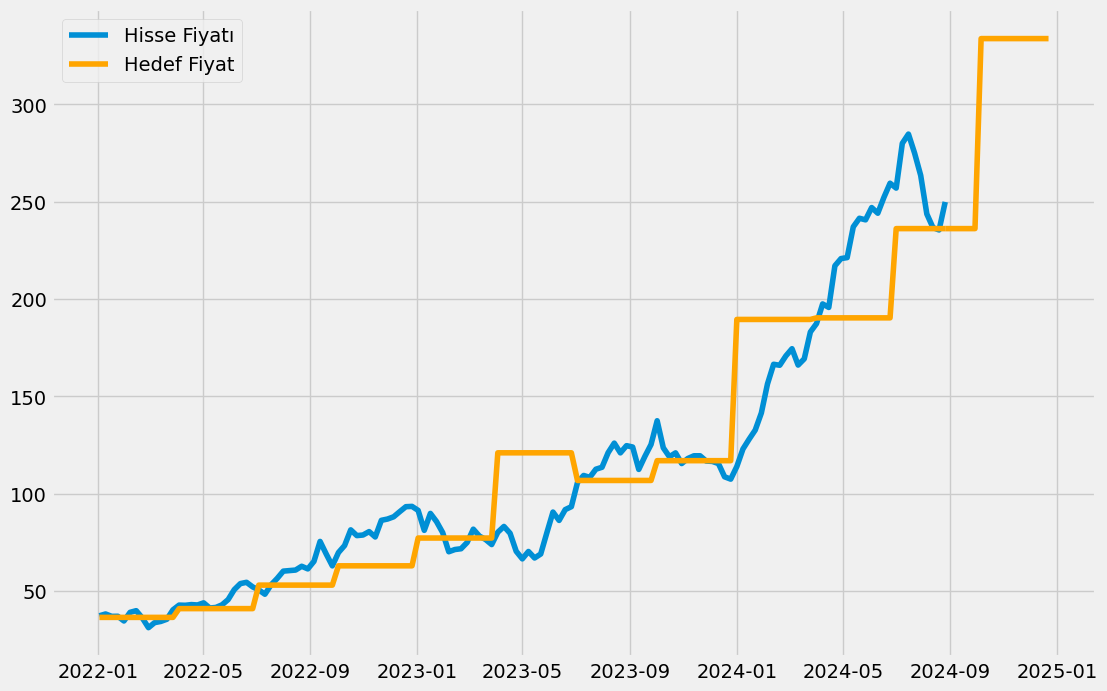

In [64]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.plot(hisse["Close"],label="Hisse Fiyatı")
plt.plot(hisse["Hedef"],label="Hedef Fiyat",color="orange")
plt.plot(yeni["Hedef"].loc["2024-08-26":],color="orange")
#plt.scatter(x=pd.date_range(start="2022-02-15",freq="M",end="2024-08-31")[::3],y=hisse["Close"].resample("Q").mean(),color="red",zorder=3,s=100,label="Çeyreklik Ortalama Fiyat")
plt.legend()